# Plotting with `plotnine`, Part 2



## Tutorial Attribution

The `plotnine` tutorial below is derived (with generous permission) from a [truely excellent tutorial for ggplot2](http://www.rebeccabarter.com/blog/2017-11-17-ggplot2_tutorial/) (written for R) by Rebecca Barter, who [hosts an excellent data science in R blog](http://www.rebeccabarter.com/). It is very close to her original materials, with changes made primarily to convert R `ggplot2` code into `plotnine` code (which is remakrably easy.

## Scales

We are going to return to our original scatterplot example to discuss scales, legend and positioning. 

To remind you, this scatterplot showed GDP per capita against life expectancy for each country colored by continent and sized by population.  

To keep things simple, let's filter to a single year.

In [13]:
gapminder_2007 = gapminder[gapminder.year == 2007]

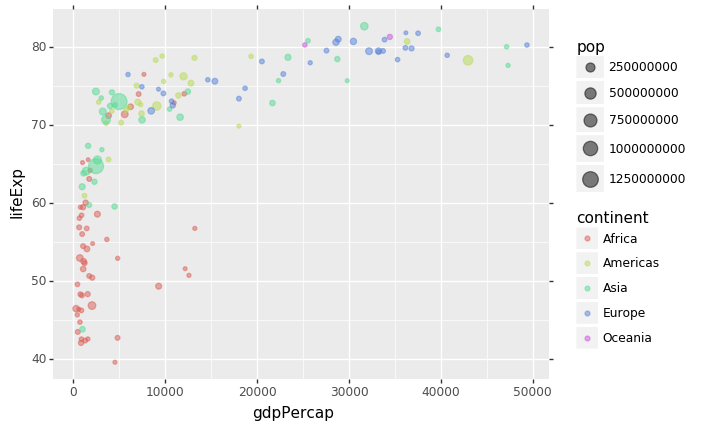

<ggplot: (-9223372029312629956)>

In [14]:
(ggplot(gapminder_2007, aes(x ='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha=0.5)
)

The scale of a plot describes the features of the space in which it is plotted. Arguably, it would be better to show `gdpPercap` on a logarithmic scale, rather than in its raw form. Fortunately, this is easy to do using a `scale` function, which can be considered another layer that transforms our plot.

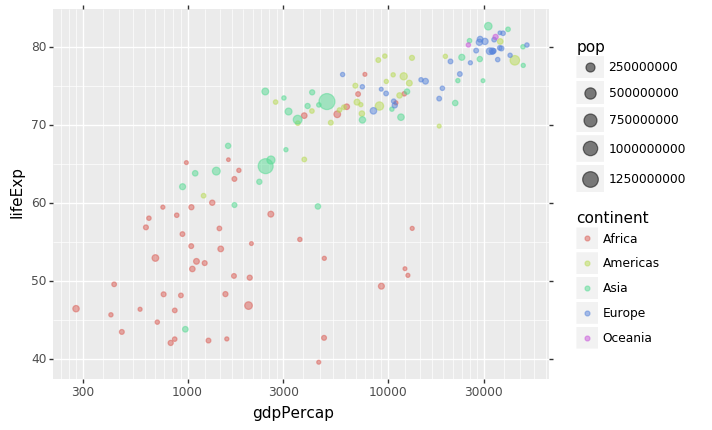

<ggplot: (-9223372029312645660)>

In [15]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha = 0.5) +
        scale_x_log10()
)

The default x- (and y-) axes scales are `scale_x_continuous` and `scale_y_continuous`, but other options include `scale_x_sqrt` and `scale_x_reverse`.

Each of these scale functions has many options including changing the limits, the breaks, etc. For example in the plot below, we manipulate the x-axis by providing arguments to our `scale` function of choice.

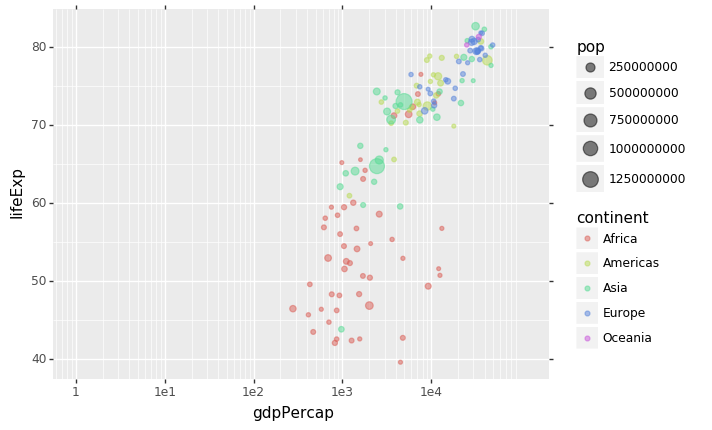

<ggplot: (-9223372029312645800)>

In [16]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        geom_point(alpha = 0.5) +
        # clean the x-axis breaks
        scale_x_log10(breaks = [1, 10, 100, 1000, 10000],
                      limits = [1, 120000])
)

We could also manipulate the scale of the size variable. Below, we expand the range of sizes and clean up the variable name. Since the variable we provided for size is a continuous variable (`pop`) we use the `scale_size_continuous` argument.

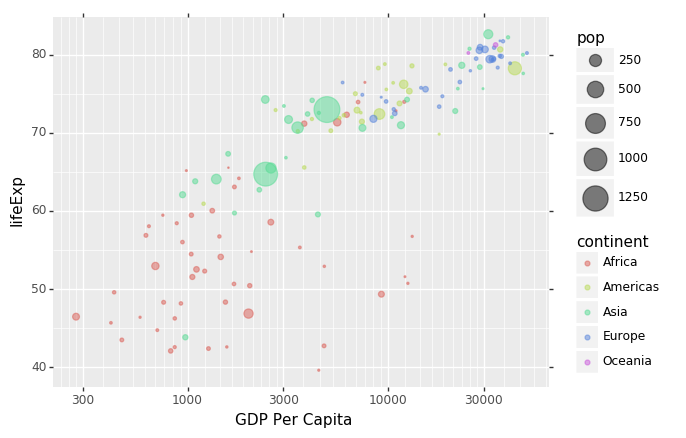

<ggplot: (7542991659)>

In [17]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10(name='GDP Per Capita') +
        # change the size scale
        scale_size(range = [0.1, 10],
                   breaks =  [250000000, 500000000, 750000000, 1000000000, 1250000000],
                   labels = ["250", "500", "750", "1000", "1250"])
)

Scales also exist for other aesthetic featuers such as `fill`, `color`, `alpha`, etc.

## Changing Labels
Notice that in the last plot, we changed the name of the x-axis using the `name` argument in `scale_x_log10()`. If you want to play with all your labels in one place, though, we can use the `labs` option. As an example, below we add a title and change the name of the y-axis and legends using the `labs` function.

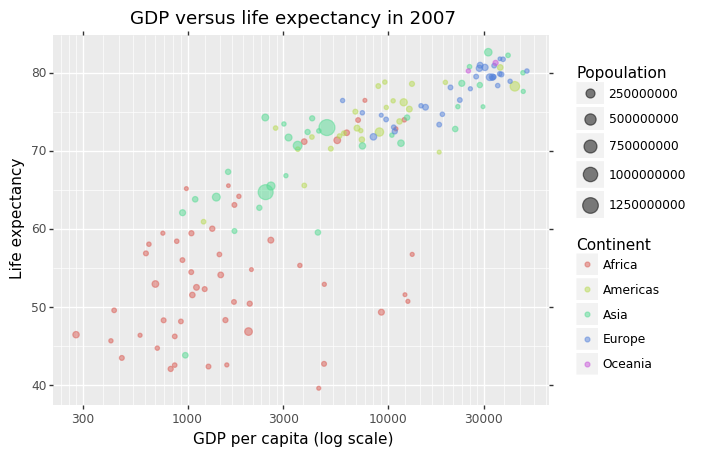

<ggplot: (-9223372029312856274)>

In [18]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10() +
        # change labels
        labs(title="GDP versus life expectancy in 2007",
             x="GDP per capita (log scale)",
             y="Life expectancy",
             size="Popoulation",
             color="Continent")
)

## Faceting

Sometimes we want to be able to make multiple plots of the same thing across different categories. This can be achieved with minimal repetition using faceting.

In the example below, we will remake the plot above individually for each continent.

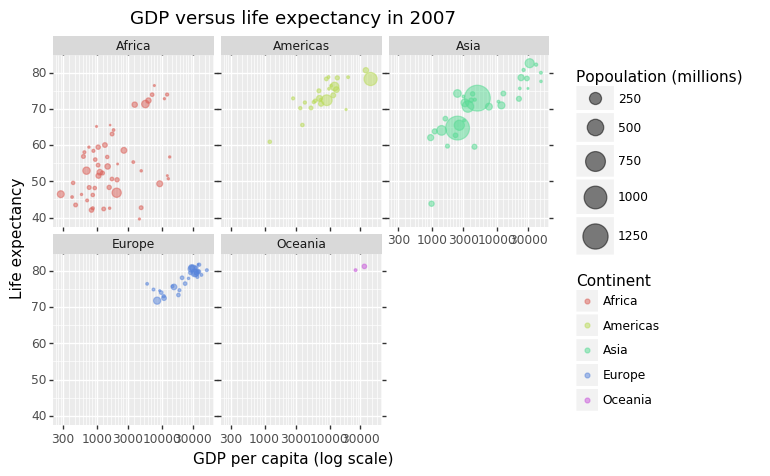

<ggplot: (-9223372029312635420)>

In [19]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10() +
        # change labels
        labs(title = "GDP versus life expectancy in 2007",
             x = "GDP per capita (log scale)",
             y = "Life expectancy",
             size = "Popoulation (millions)",
             color = "Continent") +
        # change the size scale
        scale_size(range = [0.1, 10],
                   breaks =  [250000000, 500000000, 750000000, 1000000000, 1250000000],
                   labels = ["250", "500", "750", "1000", "1250"]) +
        facet_wrap('continent')
)

## Themes: making even more beautiful figures with plotnine

One of the first things I usually do when I make a ggplot is edit the default theme. I actually really don't like the grey background, nor do I like having a grid unless it really helps with the plot interpretation.

One of the simplest themes is `theme_classic`, however there are several other themes to choose from. The `ggthemes` package offers many additional themes, but you could also make your own using the `theme()` function.

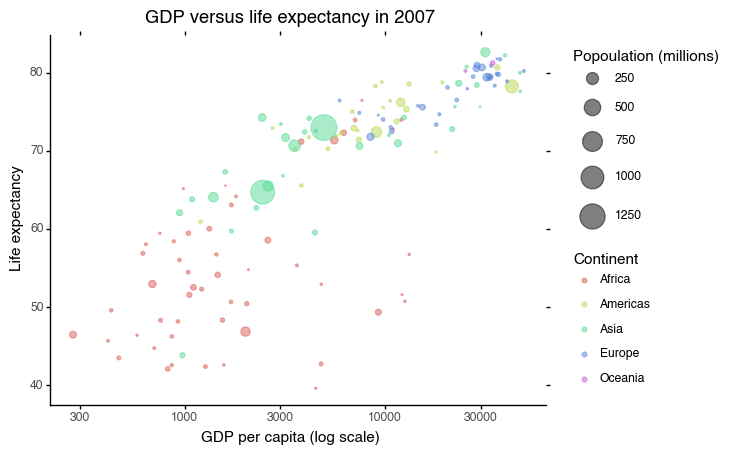

<ggplot: (7542991743)>

In [20]:
(ggplot(gapminder_2007, aes(x='gdpPercap', y='lifeExp', color='continent', size='pop')) +
        # add scatter points
        geom_point(alpha = 0.5) +
        # log-scale the x-axis
        scale_x_log10() +
        # change labels
        labs(title = "GDP versus life expectancy in 2007",
             x = "GDP per capita (log scale)",
             y = "Life expectancy",
             size = "Popoulation (millions)",
             color = "Continent") +
        # change the size scale
        scale_size(range = [0.1, 10],
                   breaks =  [250000000, 500000000, 750000000, 1000000000, 1250000000],
                   labels = ["250", "500", "750", "1000", "1250"]) + 
        # add a nicer theme
        theme_classic(base_family = "Helvetica")
)

As an example of further customization of the ggplot theme, below we do the following:

- grey the axes lines (set `axis.line = element_blank()` in `theme()`)
- add some text annotations (add `geom_text` layer)

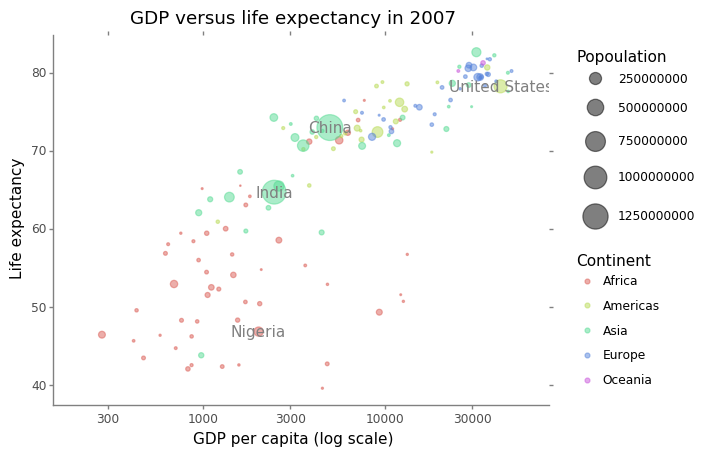

<ggplot: (7543731818)>

In [21]:
(ggplot(gapminder_2007) +
        # add scatter points
        geom_point(aes(x='gdpPercap', y='lifeExp', color='continent', size='pop'),
                   alpha = 0.5) +
        # add some text annotations for the very large countries
        geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
                  color="grey",
                  data=gapminder_2007[(gapminder_2007['pop'] > 1000000000) | (gapminder_2007.country == "Nigeria") |  (gapminder_2007.country == "United States")]) +
        # clean the axes names and breaks
        scale_x_log10(limits = [200, 60000]) +
        # change labels
        labs(title = "GDP versus life expectancy in 2007",
             x = "GDP per capita (log scale)",
             y = "Life expectancy",
             size = "Popoulation",
             color = "Continent") +
        # change the size scale
        scale_size(range = [0.1, 10]) +
        # add a nicer theme
        theme_classic() +
        # place legend at top and grey axis lines
        theme(axis_line=element_line(color="grey"),
              axis_ticks=element_line(color = "grey"))
)

## Exercises!

*If you are enrolled in Practical Data Science at Duke, don't do these exercises on your own -- we'll do them in class!*

[Plotting Exercises, Part 2](exercises/Exercise_plotting_part2.ipynb)